<a href="https://colab.research.google.com/github/fernandodeeke/semana-da-fisica-UDESC-2025/blob/main/verlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></center>
<center><h1>Semana da Física</h1></center>
<center><h2>20-09-2025</h2></center>
<center><h3>Prof. Fernando Deeke Sasse - CCT, UDESC</h3></center>    
<center><h2>Métodos de Verlet  </h2> </center>

##  1 . Método de Verlet tradicional

A integração de Verlet é um método numérico com erro global de terceira ordem usado principalmente para integrar as equações de Newton do movimento. Ela é usada frequentemente para calcular trajetórias de partículas em simulações de dinâmica molecular e computação gráfica. Se o vetor posição de uma partícula é dado por

$$
X(t)=\begin{bmatrix} x_1(t),\\ x_2(t) \\ x_3(t)  \end{bmatrix}, \qquad (1)
$$

o método é particularmente apropriado nos casos em temos uma equação de movimento para a partícula de massa $m$ é da forma

$$
\frac{d^2X}{dt^2} = \frac{1}{m}F(t,X(t)),\qquad (2)
$$

ou seja, quando $F$ não depende de um termo dissipativo $dX/dt$. Daqui para frente vamos supor que as forças envolvidas na dinâmica são todas da forma $F(t,X(t))$.

O método foi usado já em 1791 por Delambre, por Carl Størmer em 1907 para estudar trajetória de partículas em um campo eletromagnético e também por Crommelin em 1909 para computar órbita do cometa Halley. Em 1967 o método foi popularizado na aplicação a problemas de dinâmica molecular por Loup Verlet [1]. Características importantes do método são sua estabilidade e reversibilidade temporal e rapidez, comparado com outros métodos. Para maiores detalhes veja o artigo de Rojas et al. [2,3].

Como ponto de partida desenvolvemos em série de Taylor as posições $X(t)$ em termos de pequenos incrementos de tamanho $h$, para o futuro e para o passado:

$$
X(t+h)=X(t)+hV(t)+\frac{h^2}{2}A(t) + \frac{h^3}{3!}\frac{dA}{dt} +O(h^4),\qquad (3)
$$

$$
X(t-h)=X(t)-hV(t)+\frac{h^2}{2}A(t)- \frac{h^3}{3!}\frac{dA}{dt}  +O(h^4), \qquad (4)
$$

sendo $V(t)$ a velocidade e $A(t)$ a aceleração, dados por

$$
V(t)=\frac{dX}{dt}\,,\quad A(t) = \frac{dV}{dt}= \frac{d^2X}{dt^2} .\qquad (5)
$$

Somando as equações acima obtemos

$$
X(t+h) = 2 X(t) - X(t-h)+h^2A(t)+O(h^4),\qquad (6)
$$

de modo que a velocidade e a derivada da aceleração foram eliminados. Podemos também reescrever a equação acima como

$$
X(t+h) = 2 X(t) - X(t-h)+\frac{h^2}{m}F(t,X(t))+O(h^4), \qquad (7)
$$

Apesar de que o erro local seja $O(h^4)$, é possível mostrar que o erro global é de ordem $O(h^2)$ e não $O(h^3)$.

Caso a velocidade seja necessária, por exemplo, para o cálculo da energia cinética, a expressão da diferença finita central:

$$
V(t) = \frac{X(t+h)-X(t-h)}{2h}+O(h^2)\,, \qquad (8)
$$


pode ser utilizada.

A equação (7) é característica de um método multipasso implícito. O termo $X(t+h)$ deve ser obtido a partir de $X(t)$ e $X(t-h)$. O primeiro termo é uma condição inicial do problema para $t=t_0$. O segundo termo não é dado, mas pode ser calculado por algum método explícito, tal como o método de Euler:

$$
X(t_0-h) = X(t_0)-h V(t_0),\qquad (9)
$$

notando que $X(t_0)$ e $V(t_0)$ são condições iniciais do problema.

Um dos possíveis problemas do método iterativo obtido a partir de (7) é a possibilidade do aparecimento de grandes erros de arredondamento na adição de termos com magnitudes muito diferentes. O termo $h^2 F(t,X(t))/m$ pode tornar-se muito pequeno devido ao fator $h^2$, comparado com $2X(t)$ e $X(t-h)$, à medida que o processo evolui. Veremos correções para este problema mais adiante.

### Exemplo 1.1

Consideremos o problema da órbita da Terra em torno do Sol. Esta abordagem segue o vídeo [2] Tal como no problema anterior, sendo a força central, o momento angular é conservado e o movimento é planar, ou seja, pode ser descrito em um plano $xy$.  A lei de Newton da gravitação universal que descreve a dinâmica do movimento da Terra sob influência da força gravitacional do Sol é dada por

$$
\mathbf{F}=m \mathbf{a}=-\frac{GMm}{|\mathbf{r}-\mathbf{R}|^3}(\mathbf{r}-\mathbf{R}), \qquad (10)
$$

sendo $\mathbf{a}=d^2\mathbf{r}/dt^2 = (a_x,a_y)$ a aceleração da Terra,  $\mathbf{r}=(x,y)$ a posição da Terra, $\mathbf{R}=(X,Y)$ a posição do Sol, $m$ a massa da Terra, $M$ a massa do Sol e $G$ é a constante universal da gravitação. Por simplicidade suporemos que o Sol está na origem do sistema do coordenadas, ou seja, $\mathbf{R}=\mathbf{0}$. Temos então a seguinte expressão para a aceleração da Terra:

$$
\mathbf{a} =-\frac{GM}{|\mathbf{r}|^3}\mathbf{r}\,.\qquad (11)
$$

Usaremos unidades físicas convenientes em astronomia. A unidade distância é unidade astronômica (AU). Tomaremos $h= 1\, dia$. A unidade de massa é a massa solar $(M_S)$. Suporemos que no instante $t=0$ a Terra está na posição $x=1\,AU$, $y=0$. A velocidade neste ponto, é  $v_y(0)=0.01721420632\, AU/dia$. A constante gravitacional nestas unidades é dada por $G = 0.0003006696114086956\,dias^3/M_S$. Obviamente, $M=1 M_S$.



In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Parâmetros da órbita terrestre
G = 6.67e-11*(6.68e-12)**3/((5e-31)*(1.15e-5)**2)
M=1.
x0 = 1.
y0 = 0.
h = 0.5
vx0 = 0
vy0 = 0.01721420632
N = 365*2

In [ ]:
ax = lambda x,y: -G*M/(np.sqrt(x**2+y**2))**3*x
ay = lambda x,y: -G*M/(np.sqrt(x**2+y**2))**3*y
a = [ax,ay]

In [ ]:
def verlet_trad(a, x0, y0, vx0, vy0, h, N):

    x = np.zeros(N+1)
    y = np.zeros(N+1)

    x[0], y[0] = x0, y0
    x[1] = x0 + h * vx0
    y[1] = y0 + h * vy0

    for n in range(1, N):
        ax = a[0](x[n], y[n])
        ay = a[1](x[n], y[n])
        x[n+1] = 2*x[n] - x[n-1] + h**2 * ax
        y[n+1] = 2*y[n] - y[n-1] + h**2 * ay

    return x, y

In [ ]:
(X,Y) = verlet_trad(a,x0,y0, vx0, vy0,h,N)

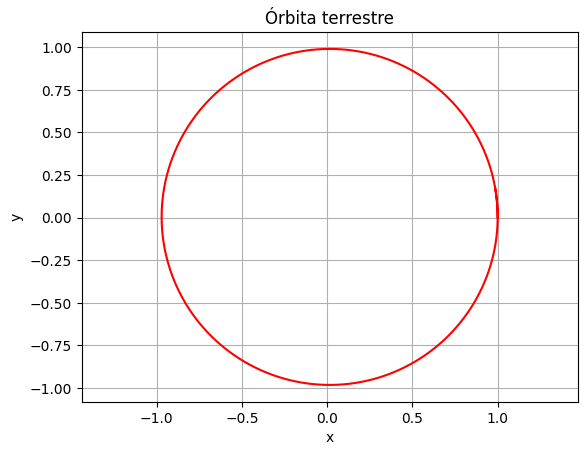

In [ ]:
plt.plot(X,Y,'r-')
plt.grid(True)
plt.title("Órbita terrestre");
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

Examinemos o tempo de execução:

In [ ]:
timeit(verlet_trad(a,x0,y0, vx0, vy0,h,N))

2.15 ms ± 477 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 2. Velocity-Verlet

O método de Verlet tradicional pode ser melhorado. De (8) temos que

$$
X(t-h)=X(t+h)-2hV(t)\,.\qquad(12)
$$

Substituindo esta expressão em (7) obtemos

$$
X(t+h) = 2X(t)-\left[X(t+h)-2hV(t)\right]+\frac{h^2}{m}F(t,X(t))+O(h^4)\,. \qquad (13)
$$

Isolando $X(t+h)$ obtemos

$$
X(t+h)=X(t)+hV(t)+\frac{h^2}{2m}F(t,X(t))+O(h^4)\,. \qquad (14)
$$

Em termos da aceleração $A(t)=F(t)/m$,

$$
X(t+h)=X(t)+hV(t)+\frac{h^2}{2}A(t)+O(h^4)\,. \qquad (15)
$$



O próximo passo consiste em determinar uma fórmula para calcular $V(t+h)$ com ordem $O(h^2)$. Substituindo (15) em (8) temos

\begin{align}
V(t)&=\frac{X(t+h)-X(t-h)}{2h}+O(h^2)\qquad(16)\\
&=\frac{1}{2h}\left[X(t)+hV(t)+\frac{h^2}{2}A(t)\right]-\frac{X(t-h)}{2h}+O(h^2)\qquad(17)\\
&=\frac{X(t)}{2h}+\frac{V(t)}{2}+\frac{h}{4}A(t)-\frac{X(t-h)}{2h}+O(h^2)\,.\qquad  (18)
\end{align}
Isolando $V(t)$ obtemos

$$
V(t) = \frac{X(t)-X(t-h)}{h}+\frac{h}{2}A(t)+O(h^2)\,. \qquad(19)
$$

De (18) temos então

$$
V(t+h) = \frac{X(t+h)-X(t)}{h}+\frac{h}{2}A(t+h)+O(h^2)\,.  (20)
$$

Somando (19) e (20) obtemos

$$
V(t+h)+V(t)=\frac{X(t+h)-X(t-h)}{h}+\frac{h}{2}\left[A(t+h)+A(t)\right]+O(h^2)\,. \qquad (21)
$$


Portanto,
$$
V(t+h)=V(t)+\frac{h}{2}\left[A(t)+A(t+h)\right]+O(h^2)\,. \qquad(22)
$$

As eqs. (15) e (22) definem o chamado método velocity-Stormer-Verlet. Notemos que agora a velocidade deve ser computada a cada passo e que em (14) temos a soma de um termo de ordem $h$ com outro de ordem $h^2$. Façamos a seguir a implementação.


### Exemplo 2.1
Suponhamos que temos uma força que depende somente da distância. Consideremos o oscilador de Duffing, regido pela força

$$
F(x) = -kx-\alpha x^3\,.
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Velocity Verlet
def velocity_verlet(f, x0, v0, m, dt, T):
    N = int(T / dt)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    a = np.zeros(N + 1)

    x[0] = x0
    v[0] = v0
    a[0] = f(x[0]) / m

    for n in range(N):
        # Atualiza posição
        x[n + 1] = x[n] + v[n] * dt + 0.5 * a[n] * dt**2

        # Calcula nova aceleração
        a[n+1] = f(x[n + 1]) / m

        # Atualiza velocidade
        v[n + 1] = v[n] + 0.5 * (a[n] + a[n+1]) * dt

    return x, v

In [ ]:
# Parâmetros físicos
k = 0.2     # constante da mola
m = 1.0      # massa
alpha = 7
f = lambda x: -k *x-alpha*x**3 # Oscilador de Duffing

In [ ]:
# Condições iniciais
x0 = 1.0
v0 = 0.0
dt = 0.01
T = 20.0

In [ ]:
# Cálculo das posições e velocidades
x, v = velocity_verlet(f, x0, v0, m, dt, T)
# Vetor de tempo
t = np.linspace(0, T, len(x))

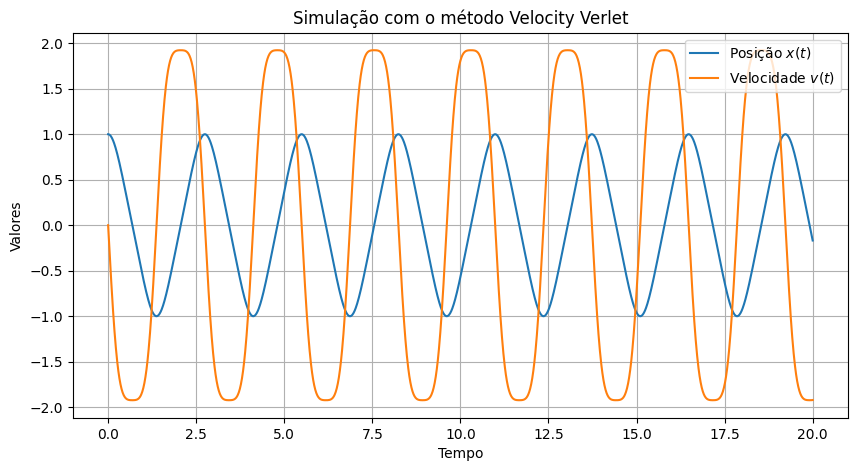

In [ ]:
# Gráficos da posição e velocidade
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Posição $x(t)$')
plt.plot(t, v, label='Velocidade $v(t)$')
plt.title('Simulação com o método Velocity Verlet')
plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.grid(True)
plt.legend()
plt.show()

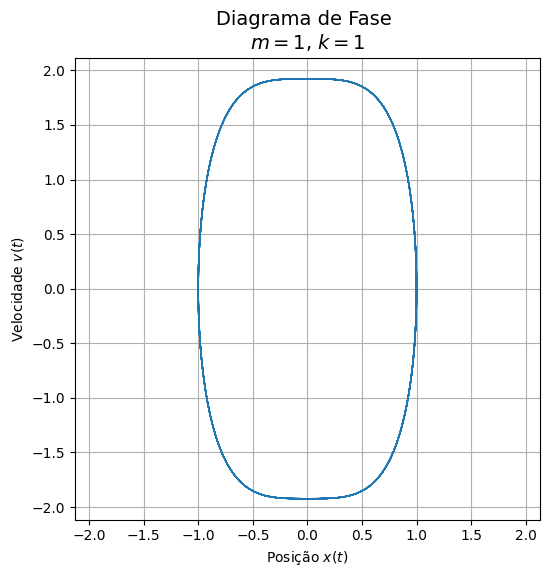

In [ ]:
# Diagrama de fase
plt.figure(figsize=(6, 6))
plt.plot(x, v, lw=1)
plt.title("Diagrama de Fase \n$m=1$, $k=1$", fontsize=14)
plt.xlabel("Posição $x(t)$")
plt.ylabel("Velocidade $v(t)$")
plt.grid(True)
plt.axis('equal')
plt.show()

### Exemplo 2.2
Façamos agora uma versão interativa, com botões deslizantes:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Velocity Verlet adaptado
def velocity_verlet(f, x0, v0, m, dt, T):
    N = int(T / dt)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    a = np.zeros(N + 1)

    x[0] = x0
    v[0] = v0
    a[0] = f(x[0]) / m

    for n in range(N):
        x[n + 1] = x[n] + v[n] * dt + 0.5 * a[n] * dt**2
        a[n+1] = f(x[n + 1]) / m
        v[n + 1] = v[n] + 0.5 * (a[n] + a[n+1]) * dt

    return x, v

# Função interativa
def simular_duffing(k=0.2, alpha=7.0, m=1.0, dt=0.01, x0=1.0, v0=0.0):
    T = 20.0
    f = lambda x: -k * x - alpha * x**3

    x, v = velocity_verlet(f, x0, v0, m, dt, T)
    t = np.linspace(0, T, len(x))

    # Gráficos
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label='Posição $x(t)$')
    plt.plot(t, v, label='Velocidade $v(t)$')
    plt.xlabel('Tempo'); plt.ylabel('Valores')
    plt.title('Oscilador de Duffing - Velocity Verlet')
    plt.grid(); plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, v)
    plt.xlabel('Posição $x$')
    plt.ylabel('Velocidade $v$')
    plt.title('Diagrama de Fase')
    plt.grid(); plt.axis('equal')

    plt.tight_layout()
    plt.show()

# Sliders
interact(
    simular_duffing,
    k=FloatSlider(min=0.0, max=5.0, step=0.1, value=0.2, description='k'),
    alpha=FloatSlider(min=0, max=20.0, step=0.5, value=5.0, description='alpha'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m'),
    dt=FloatSlider(min=0.001, max=0.1, step=0.001, value=0.01, description='dt'),
    x0=FloatSlider(min=-3.0, max=3.0, step=0.1, value=1.0, description='x0'),
    v0=FloatSlider(min=-3.0, max=3.0, step=0.1, value=0.0, description='v0'),
);


interactive(children=(FloatSlider(value=0.2, description='k', max=5.0), FloatSlider(value=5.0, description='al…

### Exemplo 2.3
Consideremos agora o um oscilador de Duffing forçado amortecido da forma:

$$
m\frac{d^2 x}{dt^2}+\mu\frac{dx}{dt}+kx+\alpha x^3=A\cos(\omega t)
$$

A implementação é a seguinte:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Velocity Verlet para força F(x, v, t)
def velocity_verlet_forcado(F, x0, v0, m, dt, T):
    N = int(T / dt)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    a = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)

    x[0] = x0
    v[0] = v0
    a[0] = F(x[0], v[0], t[0]) / m

    for n in range(N):
        x[n+1] = x[n] + v[n]*dt + 0.5*a[n]*dt**2
        a_new = F(x[n+1], v[n], t[n+1]) / m
        v[n+1] = v[n] + 0.5*(a[n] + a_new)*dt
        a[n+1] = a_new

    return x, v, t

# Função interativa
def simular_duffing_forcado(k=1.0, alpha=5.0, mu=0.2, A=5.0, omega=1.0, m=1.0, dt=0.01, x0=1.0, v0=0.0):
    T = 50.0

    def F(x, v, t):
        return -k * x - alpha * x**3 - mu * v + A * np.cos(omega * t)

    x, v, tvec = velocity_verlet_forcado(F, x0, v0, m, dt, T)

    # Gráficos
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(tvec, x, label='Posição $x(t)$')
    plt.plot(tvec, v, label='Velocidade $v(t)$')
    plt.xlabel('Tempo'); plt.ylabel('Valores')
    plt.title('Oscilador de Duffing Forçado e Amortecido')
    plt.grid(); plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, v)
    plt.xlabel('Posição $x$')
    plt.ylabel('Velocidade $v$')
    plt.title('Diagrama de Fase')
    plt.grid(); plt.axis('equal')

    plt.tight_layout()
    plt.show()

# Sliders interativos
interact(
    simular_duffing_forcado,
    k=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='k'),
    alpha=FloatSlider(min=-20.0, max=20.0, step=0.5, value=0.5, description='alpha'),
    mu=FloatSlider(min=0.0, max=2.0, step=0.05, value=0.2, description='mu'),
    A=FloatSlider(min=0.0, max=20.0, step=0.5, value=12.0, description='A'),
    omega=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='omega'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m'),
    dt=FloatSlider(min=0.001, max=0.05, step=0.001, value=0.01, description='dt'),
    x0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='x0'),
    v0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='v0'),
);


interactive(children=(FloatSlider(value=1.0, description='k', max=5.0, min=0.1), FloatSlider(value=0.5, descri…

### 3 Mapeamento de Poincaré

O *mapa de Poincaré* é uma ferramenta  da teoria qualitativa de sistemas dinâmicos, usada para investigar o comportamento de soluções em sistemas que dependem periodicamente do tempo, como é o caso de osciladores forçados.

Consideremos novamente *oscilador de Duffing forçado e amortecido*, com uma equação diferencial do tipo:

$$
m\ddot{x} + \mu \dot{x} + k x + \alpha x^3 = A \cos(\omega t)
$$

Aqui a força externa $A \cos(\omega t)$ introduz uma dependência temporal periódica com período:

$$
T_{\text{força}} = \frac{2\pi}{\omega}
$$

O mapa de Poincaré consiste em registrar o estado do sistema $(x(t), \dot{x}(t))$ apenas nos instantes múltiplos de $T_{\text{força}}$, ou seja:

$$
t_n = n T_{\text{força}}, \quad n \in \mathbb{N}
$$

Esse procedimento produz uma sequência discreta de pontos no espaço de fase, formando um retrato simplificado da dinâmica. Os padrões desses pontos permitem identificar:

- Órbitas periódicas: um número finito de pontos se repete.
- Movimento quase-periódico: os pontos formam curvas fechadas.
- Comportamento caótico: os pontos se distribuem em uma região irregular.


O mapa de Poincaré reduz o estudo de um sistema contínuo para um sistema discreto, tornando mais evidente a existência de bifurcações, periodicidade e caos.


### Exemplo 2.4
Mapeamento de Poincaré e oscilador de Duffing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Força total do sistema Duffing com amortecimento e excitação periódica
def F(x, v, t, k, alpha, mu, A, omega):
    return -k * x - alpha * x**3 - mu * v + A * np.cos(omega * t)

# Velocity Verlet com mapeamento de Poincaré
def velocity_verlet_poincare(x0, v0, m, dt, T, k, alpha, mu, A, omega):
    N = int(T / dt)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    t = np.linspace(0, T, N + 1)

    x[0], v[0] = x0, v0
    a = np.zeros(N + 1)
    a[0] = F(x[0], v[0], t[0], k, alpha, mu, A, omega) / m

    T_drive = 2 * np.pi / omega
    poincare_x, poincare_v = [], []

    for n in range(N):
        x[n + 1] = x[n] + v[n] * dt + 0.5 * a[n] * dt**2
        a_new = F(x[n + 1], v[n], t[n + 1], k, alpha, mu, A, omega) / m
        v[n + 1] = v[n] + 0.5 * (a[n] + a_new) * dt
        a[n + 1] = a_new

        # Mapeamento de Poincaré
        if abs((t[n + 1] % T_drive)) < dt / 2:
            poincare_x.append(x[n + 1])
            poincare_v.append(v[n + 1])

    return poincare_x, poincare_v

# Função para interface interativa
def plot_poincare(k=1.0, alpha=5.0, mu=0.2, A=5.0, omega=1.0,
                  m=1.0, dt=0.01, T=200.0, x0=1.0, v0=0.0):

    px, pv = velocity_verlet_poincare(x0, v0, m, dt, T, k, alpha, mu, A, omega)

    plt.figure(figsize=(6, 6))
    plt.plot(px, pv, 'ro', markersize=2)
    plt.title('Mapa de Poincaré\nOscilador de Duffing Forçado e Amortecido')
    plt.xlabel('x')
    plt.ylabel('v')
    plt.grid()
    plt.axis('equal')
    plt.show()

# Interface com sliders
interact(
    plot_poincare,
    k=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='k'),
    alpha=FloatSlider(min=0.0, max=30.0, step=0.5, value=1.0, description='alpha'),
    mu=FloatSlider(min=0.0, max=2.0, step=0.05, value=0.2, description='mu'),
    A=FloatSlider(min=0.0, max=20.0, step=0.5, value=12.0, description='A'),
    omega=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='omega'),
    m=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='m'),
    dt=FloatSlider(min=0.001, max=0.05, step=0.001, value=0.01, description='dt'),
    T=FloatSlider(min=20.0, max=500.0, step=10.0, value=200.0, description='T'),
    x0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='x0'),
    v0=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='v0'),
);


interactive(children=(FloatSlider(value=1.0, description='k', max=5.0, min=0.1), FloatSlider(value=1.0, descri…

### Exemplo 2.5
Órbita de um asteróide em torno do Sol.

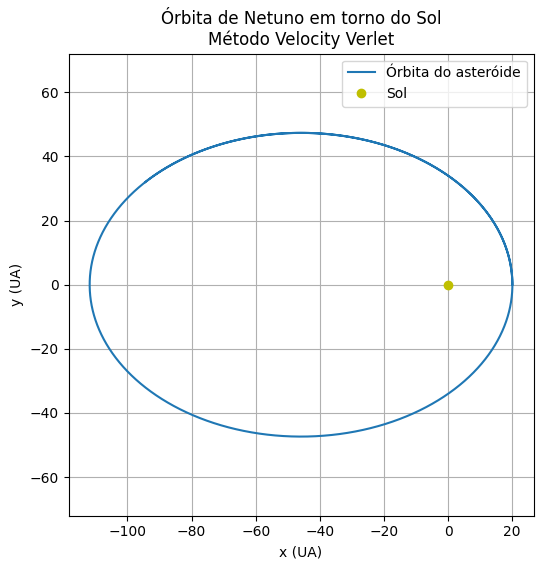

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes do sistema
G = 4 * np.pi**2 / 365.25**2  # UA³ / dia² / M_solar
M_sun = 1.0  # massa solar em unidades normalizadas

# Força gravitacional central (2D)
def grav_force(r):
    norm_r = np.linalg.norm(r)
    return -G * M_sun * r / norm_r**3

# Método de Velocity Verlet
def velocity_verlet_orbit(r0, v0, dt, T):
    N = int(T / dt)
    r = np.zeros((N + 1, 2))
    v = np.zeros((N + 1, 2))
    t = np.linspace(0, T, N + 1)

    r[0], v[0] = r0, v0
    a = np.zeros((N + 1, 2))
    a[0] = grav_force(r[0])

    for n in range(N):
        r[n+1] = r[n] + v[n]*dt + 0.5*a[n]*dt**2
        a_new = grav_force(r[n+1])
        v[n+1] = v[n] + 0.5*(a[n] + a_new)*dt
        a[n+1] = a_new

    return r, v, t

# Condições iniciais para o asteróido (em UA e UA/dia)
r0 = np.array([20.07, 0.0])              # posição inicial (em UA)
v0 = np.array([0.0, 0.005])            # velocidade inicial perpendicular (em UA/dia)
dt = 1.0                                 # passo de tempo: 1 dia
T = 700*365                               # tempo total: 700 anos em dias


# Simulação
r, v, t = velocity_verlet_orbit(r0, v0, dt, T)

plt.figure(figsize=(6, 6))
plt.plot(r[:, 0], r[:, 1], label='Órbita do asteróide')
plt.plot(0, 0, 'yo', label='Sol')  # Sol na origem
plt.xlabel('x (UA)')
plt.ylabel('y (UA)')
plt.title('Órbita de Netuno em torno do Sol\nMétodo Velocity Verlet')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()


### Dados iniciais a partir de afélio e periélio

Dado um corpo em órbita elíptica ao redor do Sol, como um cometa ou asteroide, podemos determinar as condições iniciais da simulação (posição e velocidade) conhecendo a distância ao periélio $r_p$ e ao afélio $r_a$. Suponha que o movimento esteja restrito ao plano $xy$ e que o corpo esteja no periélio no instante inicial.

Os parâmetros orbitais em astronomia são especificados por


- Distância ao periélio: $r_p$
- Distância ao afélio: $r_a$
- Semi-eixo maior:
  $$
  a = \frac{r_p + r_a}{2}
  $$
- Excentricidade:
  $$
  e = \frac{r_a - r_p}{r_a + r_p}
  $$

Resolvendo para  $r_p$ em ambas equações acima temos:

$$
r_p = a(1-e)\,.
$$


Usando a conservação da energia total por unidade de massa temos

$$
E = \frac{v^2}{2} - \frac{GM}{r}\,,
$$

de modo que  a energia de uma órbita elíptica  é dada por

$$
E = -\frac{GM}{2a}
$$

Igualando as expressões da energia no periélio obtemos

$$
\frac{v_p^2}{2} - \frac{GM}{r_p} = -\frac{GM}{2a}\,.
$$

Resolvendo para $v_p$ (velocidade no periélio) temos

$$
v_p = \sqrt{GM \left( \frac{2}{r_p} - \frac{1}{a} \right)}
$$

Em termos  de $a$ e $e$, usando a relação $r_p = a(1 - e)$ temos

$$
v_p = \sqrt{\frac{GM(1 + e)}{a(1 - e)}}
$$

Supondo condições iniciais no periélio, temos


-  Posição inicial: $\vec{r}_0 = (r_p, 0)$
-  Velocidade inicial: $\vec{v}_0 = (0, v_p)$ (ortogonal ao vetor posição)


Se usarmos unidades astronômicas (UA), anos e massas solares, então:

$$
G = \frac{4\pi^2}{(365.25)^2} \approx 0.000295912 \text{ UA}^3/\text{dia}^2
$$

e $M = 1$ (massa solar).

### Exemplo 2.6
Apliquemos tais ideias para calcular a trajetória do cometa Halley. Calcularemos o período da órbita.

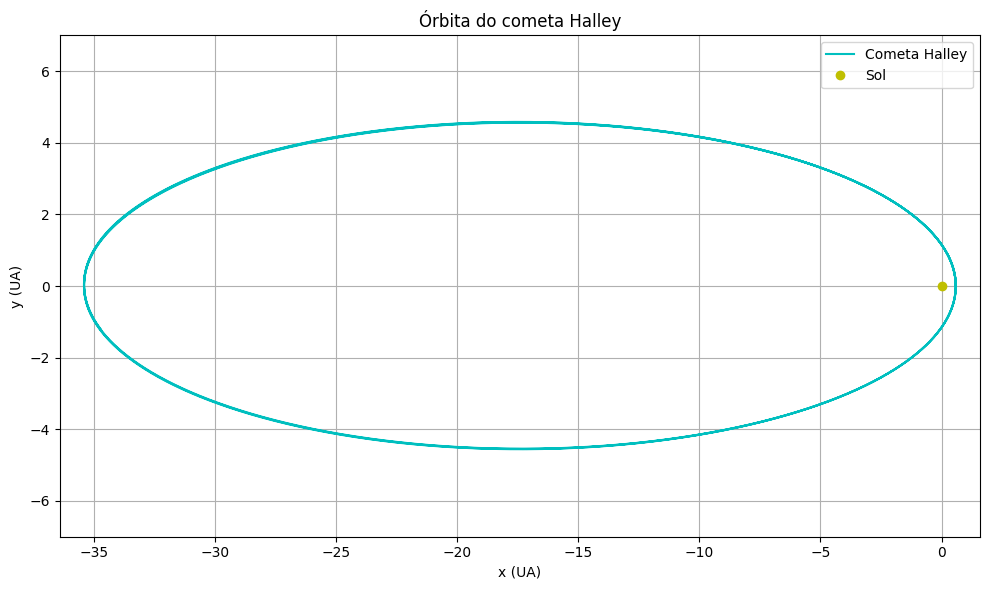

np.float64(76.33401779603011)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 4 * np.pi**2 / 365.25**2  # UA^3 / dia^2 / M_solar
M_sun = 1.0  # massa solar normalizada
dt = 1.0     # passo de tempo em dias
T_max = 100000  # tempo total de simulação em dias (cobre vários períodos)

# Dados do cometa Halley
a = 17.8
e = 0.967
r_peri = a * (1 - e)
v_peri = np.sqrt(G * M_sun * (1 + e) / (a * (1 - e)))

# Condições iniciais no periélio
r0 = np.array([r_peri, 0.0])
v0 = np.array([0.0, v_peri])

# Inicialização
N = int(T_max / dt)
r = np.zeros((N + 1, 2))
v = np.zeros((N + 1, 2))
a_vec = np.zeros((N + 1, 2))
t = np.linspace(0, T_max, N + 1)

r[0], v[0] = r0, v0
a_vec[0] = -G * r[0] / np.linalg.norm(r[0])**3

perihelion_times = []

# Simulação com Velocity Verlet
for n in range(N):
    r[n + 1] = r[n] + v[n] * dt + 0.5 * a_vec[n] * dt**2
    a_new = -G * r[n + 1] / np.linalg.norm(r[n + 1])**3
    v[n + 1] = v[n] + 0.5 * (a_vec[n] + a_new) * dt
    a_vec[n + 1] = a_new

    # Detecta passagem pelo periélio (mínimo de distância ao Sol)
    if n > 0:
        d_prev = np.linalg.norm(r[n - 1])
        d_curr = np.linalg.norm(r[n])
        d_next = np.linalg.norm(r[n + 1])
        if d_curr < d_prev and d_curr < d_next:
            perihelion_times.append(t[n])

# Cálculo do período orbital (diferença entre duas passagens pelo periélio)
if len(perihelion_times) >= 2:
    period = perihelion_times[1] - perihelion_times[0]
else:
    period = None

# Plotando a órbita

plt.figure(figsize=(10, 6))
plt.plot(r[:, 0], r[:, 1], 'c-', label='Cometa Halley')
plt.plot(0, 0, 'yo', label='Sol')
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbita do cometa Halley")
plt.grid(True)
plt.xlim(r[:, 0].min() - 1, r[:, 0].max() + 1)
plt.ylim(-7, 7)
plt.legend()
plt.tight_layout()
plt.show()

period/365.25

### Exemplo 2.7

Resolvamos o problema anterior usando Verlet tradicional, agora na forma vetorizada.

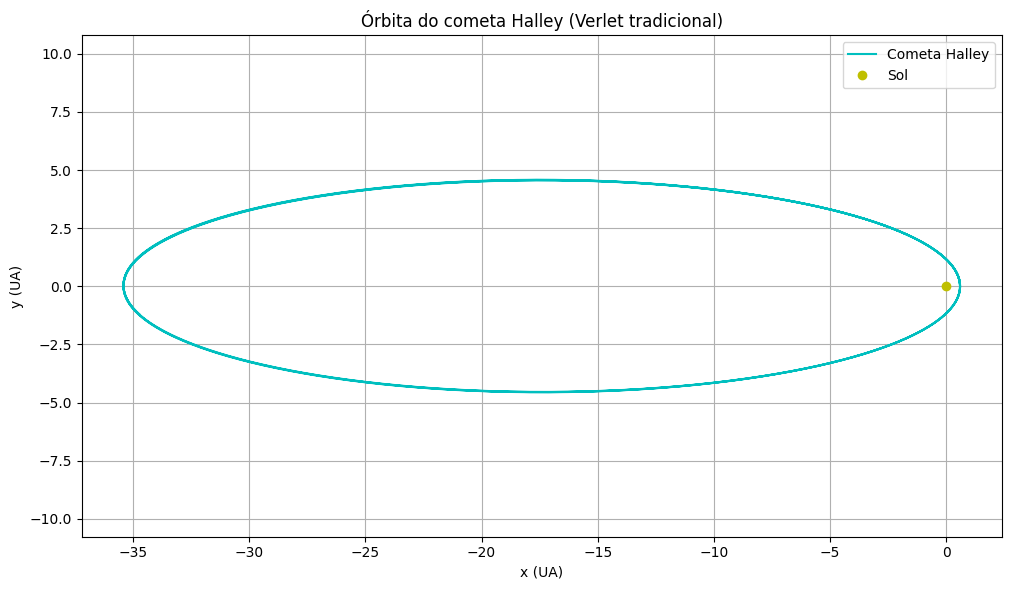

np.float64(76.33401779603011)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 4 * np.pi**2 / 365.25**2  # UA^3 / dia^2 / M_solar
M_sun = 1.0
dt = 1.0
T_max = 100000

# Dados do cometa Halley
a = 17.8
e = 0.967
r_peri = a * (1 - e)
v_peri = np.sqrt(G * M_sun * (1 + e) / (a * (1 - e)))

# Condições iniciais no periélio
r0 = np.array([r_peri, 0.0])
v0 = np.array([0.0, v_peri])

# Inicialização
N = int(T_max / dt)
r = np.zeros((N + 1, 2))
v = np.zeros((N + 1, 2))
t = np.linspace(0, T_max, N + 1)

r[0], v[0] = r0, v0
a0 = -G * r0 / np.linalg.norm(r0)**3
r[1] = r[0] + v[0] * dt + 0.5 * a0 * dt**2
# Usamos a expansão de Taylor de 2ª ordem em vez de r[1] = r[0] + v[0] * h


# Verlet tradicional
for n in range(1, N):
    a = -G * r[n] / np.linalg.norm(r[n])**3
    r[n + 1] = 2 * r[n] - r[n - 1] + dt**2 * a

# Estimativa das velocidades médias em cada subintercalo para análise posterior
# Não é essencial para o cálculo
v[1:-1] = (r[2:] - r[:-2]) / (2 * dt) #(r[n+1]-r[n-1])/2h
v[0] = v0
#Definimos a última velocidade como igual à penúltima, pois seu valor é desconhecido
v[-1] = v[-2]

# Detectar periélios
perihelion_times = []
for n in range(1, N):
    d_prev = np.linalg.norm(r[n - 1])
    d_curr = np.linalg.norm(r[n])
    d_next = np.linalg.norm(r[n + 1])
    if d_curr < d_prev and d_curr < d_next:
        perihelion_times.append(t[n])

# Cálculo do período orbital
if len(perihelion_times) >= 2:
    period = perihelion_times[1] - perihelion_times[0]
else:
    period = None

# Plotando a órbita
plt.figure(figsize=(10, 6))
plt.plot(r[:, 0], r[:, 1], 'c-', label='Cometa Halley')
plt.plot(0, 0, 'yo', label='Sol')
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbita do cometa Halley (Verlet tradicional)")
plt.grid(True)
plt.xlim(r[:, 0].min() - 1, r[:, 0].max() + 1)
plt.ylim(-7, 7)
plt.legend()
plt.tight_layout()
plt.axis('equal')
plt.show()

# Retornar período em anos
period / 365.25 if period else None

### Exemplo 2.8
Implementemos o problema dos três corpos no plano.

(np.float64(-2.6503113153646685),
 np.float64(2.221443395969746),
 np.float64(-2.472427314258679),
 np.float64(2.2438091096085064))

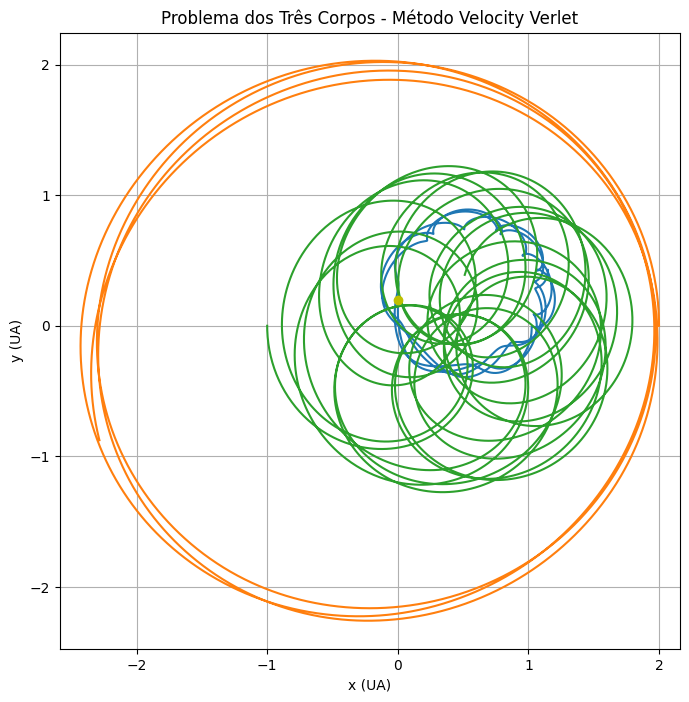

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constante gravitacional (UA^3 / dia^2 / M_solar)
G = 4 * np.pi**2 / 365.25**2

# Número de corpos
N_bodies = 3

# Função que calcula as acelerações entre os corpos
def compute_accelerations(positions, masses):
    N = len(positions)
    acc = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                r_vec = positions[j] - positions[i]
                r = np.linalg.norm(r_vec)
                acc[i] += G * masses[j] * r_vec / r**3
    return acc

# Função do método Velocity Verlet
def velocity_verlet_3body(pos0, vel0, masses, dt, T):
    steps = int(T / dt)
    pos = np.zeros((steps + 1, N_bodies, 2))
    vel = np.zeros((steps + 1, N_bodies, 2))
    acc = np.zeros((steps + 1, N_bodies, 2))

    pos[0] = pos0
    vel[0] = vel0
    acc[0] = compute_accelerations(pos[0], masses)

    for n in range(steps):
        pos[n + 1] = pos[n] + vel[n] * dt + 0.5 * acc[n] * dt**2
        acc[n + 1] = compute_accelerations(pos[n + 1], masses)
        vel[n + 1] = vel[n] + 0.5 * (acc[n] + acc[n + 1]) * dt

    return pos, vel

# Condições iniciais para 3 corpos
# Massas dos corpos: Sol, planeta 1, planeta 2
masses = np.array([1.0, 0.3, 0.09])

# Posições iniciais em UA
r0 = np.array([[0, 0.2], [2, 0], [-1, 0]])

# Velocidades orbitais dos planetas em sentido contrário (em y), calculadas para órbitas circulares
v1 = np.array([0, np.sqrt(G * masses[0] / np.linalg.norm(r0[1]) )])
v2 = np.array([0, -np.sqrt(G * masses[0] / np.linalg.norm(r0[2]) )])

# Velocidade do Sol para garantir momento linear total nulo
v_sun = -(masses[1]*v1 + masses[2]*v2) / masses[0]

# Vetor de velocidades iniciais
v0 = np.array([v_sun, v1, v2])

# Simulação
dt = 1.0
T = 5000
positions, velocities = velocity_verlet_3body(r0, v0, masses, dt, T)

# Plotando trajetórias
plt.figure(figsize=(8, 8))
for i in range(N_bodies):
    plt.plot(positions[:, i, 0], positions[:, i, 1], label=f'Corpo {i+1}')
plt.plot(positions[0, 0, 0], positions[0, 0, 1], 'yo', label='Início do Sol')
plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Problema dos Três Corpos - Método Velocity Verlet")
plt.grid(True)
plt.axis('equal')

### Exemplo 2.9

Problema dos três corpos fora do plano

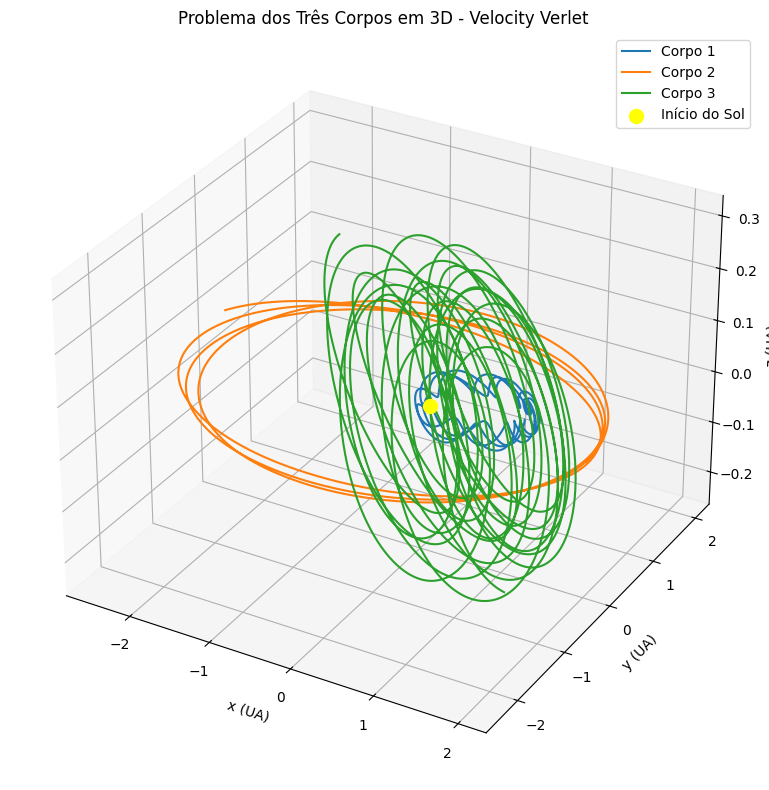

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constante gravitacional (UA^3 / dia^2 / M_solar)
G = 4 * np.pi**2 / 365.25**2

# Número de corpos
N_bodies = 3

# Função que calcula as acelerações entre os corpos
def compute_accelerations_3D(positions, masses):
    N = len(positions)
    acc = np.zeros_like(positions)
    for i in range(N):
        for j in range(N):
            if i != j:
                r_vec = positions[j] - positions[i]
                r = np.linalg.norm(r_vec)
                acc[i] += G * masses[j] * r_vec / r**3
    return acc

# Método de Velocity Verlet generalizado para 3D
def velocity_verlet_3D(pos0, vel0, masses, dt, T):
    steps = int(T / dt)
    pos = np.zeros((steps + 1, N_bodies, 3))
    vel = np.zeros((steps + 1, N_bodies, 3))
    acc = np.zeros((steps + 1, N_bodies, 3))

    pos[0] = pos0
    vel[0] = vel0
    acc[0] = compute_accelerations_3D(pos[0], masses)

    for n in range(steps):
        pos[n + 1] = pos[n] + vel[n] * dt + 0.5 * acc[n] * dt**2
        acc[n + 1] = compute_accelerations_3D(pos[n + 1], masses)
        vel[n + 1] = vel[n] + 0.5 * (acc[n] + acc[n + 1]) * dt

    return pos, vel

# Massas dos corpos
masses = np.array([1.0, 0.3, 0.09])

# Posições iniciais (3D)
r0 = np.array([
    [0.0, 0.2, 0.0],
    [2.0, 0.0, 0.0],
    [-1.0, 0.0, 0.3]
])

# Velocidades iniciais (3D)
v1 = np.array([0, np.sqrt(G * masses[0] / np.linalg.norm(r0[1])), 0])
v2 = np.array([0, -np.sqrt(G * masses[0] / np.linalg.norm(r0[2])), 0])
v_sun = -(masses[1] * v1 + masses[2] * v2) / masses[0]
v0 = np.array([v_sun, v1, v2])

# Simulação
dt = 1.0
T = 5000
positions, velocities = velocity_verlet_3D(r0, v0, masses, dt, T)

# Gráfico 3D das trajetórias
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(N_bodies):
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], label=f'Corpo {i+1}')
ax.scatter(positions[0, 0, 0], positions[0, 0, 1], positions[0, 0, 2], c='yellow', s=100, label='Início do Sol')
ax.set_xlabel("x (UA)")
ax.set_ylabel("y (UA)")
ax.set_zlabel("z (UA)")
ax.set_title("Problema dos Três Corpos em 3D - Velocity Verlet")
ax.legend()
plt.tight_layout()
plt.show()

### Exemplo 3.10

Problema dos três corpos com gráfico interativo.

In [1]:
import numpy as np
import plotly.graph_objects as go

# Constante gravitacional (UA^3 / dia^2 / M_solar)
G = 4 * np.pi**2 / 365.25**2

# Número de corpos
N_bodies = 3

# Função que calcula as acelerações entre os corpos em 3D
def compute_accelerations_3D(positions, masses):
    acc = np.zeros_like(positions)
    for i in range(len(positions)):
        for j in range(len(positions)):
            if i != j:
                r_vec = positions[j] - positions[i]
                r = np.linalg.norm(r_vec)
                acc[i] += G * masses[j] * r_vec / r**3
    return acc

# Método de Velocity Verlet generalizado para 3D
def velocity_verlet_3D(pos0, vel0, masses, dt, T):
    steps = int(T / dt)
    pos = np.zeros((steps + 1, N_bodies, 3))
    vel = np.zeros((steps + 1, N_bodies, 3))
    acc = np.zeros((steps + 1, N_bodies, 3))

    pos[0] = pos0
    vel[0] = vel0
    acc[0] = compute_accelerations_3D(pos[0], masses)

    for n in range(steps):
        pos[n + 1] = pos[n] + vel[n] * dt + 0.5 * acc[n] * dt**2
        acc[n + 1] = compute_accelerations_3D(pos[n + 1], masses)
        vel[n + 1] = vel[n] + 0.5 * (acc[n] + acc[n + 1]) * dt

    return pos, vel

# Massas dos corpos
masses = np.array([1.0, 0.3, 0.2])

# Posições iniciais (3D)
r0 = np.array([
    [0.7, 0.2, 0.9],
    [2.0, 0.2, -0.6],
    [-1.0, 0.0, 0.3]
])

# Velocidades iniciais (3D)
v1 = np.array([0., 4.e-3, 1e-3])
v2 = np.array([-2e-4, 1e-3, 0])
v_sun = -(masses[1] * v1 + masses[2] * v2) / masses[0]
v0 = np.array([v_sun, v1, v2])

# Simulação
dt = 0.5
T = 1000
positions, velocities = velocity_verlet_3D(r0, v0, masses, dt, T)

# Gráfico interativo com Plotly
fig = go.Figure()

for i in range(N_bodies):
    fig.add_trace(go.Scatter3d(
        x=positions[:, i, 0],
        y=positions[:, i, 1],
        z=positions[:, i, 2],
        mode='lines',
        name=f'Corpo {i+1}'
    ))



# Marcadores para os corpos na posição inicial
colors = ['yellow', 'blue', 'green']
labels = ['Sol (início)', 'Planeta 1 (início)', 'Planeta 2 (início)']

for i in range(N_bodies):
    fig.add_trace(go.Scatter3d(
        x=[positions[0, i, 0]],
        y=[positions[0, i, 1]],
        z=[positions[0, i, 2]],
        mode='markers',
        marker=dict(size=5, color=colors[i]),
        name=labels[i]
    ))

fig.update_layout(
    title="Órbitas 3D dos Três Corpos (Plotly)",
    scene=dict(
        xaxis_title='x (UA)',
        yaxis_title='y (UA)',
        zaxis_title='z (UA)',
        aspectmode='data'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

A seguir faremos uma animação do problemas dos 3 corpos.

In [2]:
import numpy as np
import plotly.graph_objects as go

# Constante gravitacional
G = 4 * np.pi**2 / 365.25**2
N_bodies = 3

def compute_accelerations_3D(positions, masses):
    acc = np.zeros_like(positions)
    for i in range(len(positions)):
        for j in range(len(positions)):
            if i != j:
                r_vec = positions[j] - positions[i]
                r = np.linalg.norm(r_vec)
                acc[i] += G * masses[j] * r_vec / r**3
    return acc

def velocity_verlet_3D(pos0, vel0, masses, dt, T):
    steps = int(T / dt)
    pos = np.zeros((steps + 1, N_bodies, 3))
    vel = np.zeros((steps + 1, N_bodies, 3))
    acc = np.zeros((steps + 1, N_bodies, 3))

    pos[0], vel[0] = pos0, vel0
    acc[0] = compute_accelerations_3D(pos0, masses)

    for n in range(steps):
        pos[n+1] = pos[n] + vel[n]*dt + 0.5*acc[n]*dt**2
        acc[n+1] = compute_accelerations_3D(pos[n+1], masses)
        vel[n+1] = vel[n] + 0.5*(acc[n] + acc[n+1])*dt

    return pos

# Parâmetros iniciais
masses = np.array([2.0, 0.7, 0.7])
r0 = np.array([[0.3, 0.2, 0.9], [2.0, 0.2, -0.6], [-1.0, 0.0, 0.3]])
v1 = np.array([0.0, 4.e-3, 1])
v2 = np.array([-2e-4, 1e-3, 0])
v0m = - (masses[1]*v1 + masses[2]*v2) / masses[0]  # para momento linear total nulo
v0 = np.array([v0m, v1, v2])

# Simulação
dt = 1
T = 15000
positions = velocity_verlet_3D(r0, v0, masses, dt, T)

# Fixar limites dos eixos
x_min, x_max = positions[:, :, 0].min(), positions[:, :, 0].max()
y_min, y_max = positions[:, :, 1].min(), positions[:, :, 1].max()
z_min, z_max = positions[:, :, 2].min(), positions[:, :, 2].max()

frames = []
for k in range(0, len(positions), 10):
    frame_data = [go.Scatter3d(
        x=[positions[k, i, 0]],
        y=[positions[k, i, 1]],
        z=[positions[k, i, 2]],
        mode='markers',
        marker=dict(size=5),
        name=f'Corpo {i+1}'
    ) for i in range(N_bodies)]
    frames.append(go.Frame(data=frame_data, name=str(k)))

fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Órbitas 3D dos Três Corpos",
        scene=dict(
            xaxis=dict(title='x (UA)', range=[x_min, x_max], autorange=False,
                       showbackground=True, backgroundcolor='rgb(240,240,240)'),
            yaxis=dict(title='y (UA)', range=[y_min, y_max], autorange=False,
                       showbackground=True, backgroundcolor='rgb(240,240,240)'),
            zaxis=dict(title='z (UA)', range=[z_min, z_max], autorange=False,
                       showbackground=True, backgroundcolor='rgb(240,240,240)'),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play", method="animate", args=[None, {
                "frame": {"duration": 50}, "fromcurrent": True, "mode": "immediate"}])]
        )]
    )
)

fig.show()

### Exemplo 3.11
Problema com 5 corpos

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Constante gravitacional em unidades astronômicas (UA^3 / dia^2 / M_solar)
G = 4 * np.pi**2 / 365.25**2
N_bodies = 5  # Número de corpos

# Função para calcular acelerações gravitacionais
def compute_accelerations_3D(positions, masses):
    acc = np.zeros_like(positions)
    for i in range(len(positions)):
        for j in range(len(positions)):
            if i != j:
                r_vec = positions[j] - positions[i]  # vetor entre os corpos
                r = np.linalg.norm(r_vec)           # distância
                acc[i] += G * masses[j] * r_vec / r**3
    return acc

# Método de integração Velocity Verlet
def velocity_verlet_3D(pos0, vel0, masses, dt, T):
    steps = int(T / dt)
    pos = np.zeros((steps + 1, N_bodies, 3))
    vel = np.zeros((steps + 1, N_bodies, 3))
    acc = np.zeros((steps + 1, N_bodies, 3))
    pos[0], vel[0] = pos0, vel0
    acc[0] = compute_accelerations_3D(pos0, masses)

    for n in range(steps):
        pos[n+1] = pos[n] + vel[n]*dt + 0.5*acc[n]*dt**2
        acc[n+1] = compute_accelerations_3D(pos[n+1], masses)
        vel[n+1] = vel[n] + 0.5*(acc[n] + acc[n+1])*dt

    return pos

# Inicialização das massas (em massas solares)
masses = np.array([1.0, 0.1, 0.1, 0.5, 0.2])

# Posições iniciais (UA)
r0 = np.array([
    [5.0, 0.9, 1.0],
    [1.0, 0.0, 0.5],
    [-2.0, 2.0, -0.6],
    [0.6, 1.0, 0.1],
    [0.0, -8.0, -0.2]
])

# Velocidades orbitais para corpos 1 a 4 em torno do corpo 0
v = []
for i in range(1, N_bodies):
    r_mag = np.linalg.norm(r0[i])
    v_mag = np.sqrt(G * masses[0] / r_mag)
    direction = np.cross(r0[i], [0, 0, 1])
    direction /= np.linalg.norm(direction)
    v.append(v_mag * direction)

v = np.array(v)

# Velocidade do corpo central para conservar momento linear total
v0_sol = -np.sum([masses[i+1]*v[i] for i in range(N_bodies-1)], axis=0) / masses[0]
v0 = np.vstack([v0_sol, v])

# Simulação
dt = 1.0
T = 15000
positions = velocity_verlet_3D(r0, v0, masses, dt, T)

# Limites fixos dos eixos
x_min, x_max = positions[:, :, 0].min(), positions[:, :, 0].max()
y_min, y_max = positions[:, :, 1].min(), positions[:, :, 1].max()
z_min, z_max = positions[:, :, 2].min(), positions[:, :, 2].max()

# Frames para animação
frames = []
for k in range(0, len(positions), 10):
    frame_data = [go.Scatter3d(
        x=[positions[k, i, 0]],
        y=[positions[k, i, 1]],
        z=[positions[k, i, 2]],
        mode='markers',
        marker=dict(size=4),
        name=f'Corpo {i+1}'
    ) for i in range(N_bodies)]
    frames.append(go.Frame(data=frame_data, name=str(k)))

# Animação 3D com eixos e câmera fixos
fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Órbitas 3D de 5 Corpos",
        scene=dict(
            xaxis=dict(title='x (UA)', range=[x_min, x_max], autorange=False),
            yaxis=dict(title='y (UA)', range=[y_min, y_max], autorange=False),
            zaxis=dict(title='z (UA)', range=[z_min, z_max], autorange=False),
            aspectmode='manual',
            aspectratio=dict(x=1, y=1, z=1),
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play", method="animate", args=[None, {
                "frame": {"duration": 50}, "fromcurrent": True, "mode": "immediate"}])]
        )]
    )
)

fig.show()

### **Exercícios**

**1.**
Use o algoritmo do Exemplo 2.1  para estudar a equação

$$
m\frac{d^2}{dt^2}+\mu\frac{dx}{dt}+\beta \sin(\kappa x)=A\cos(\omega t)\,.
$$

Faça os gráficos de $x(t)$ e  diagramas de fase $x(t) \times v(t)$.




**2.** Considere o  asteroide Davida: https://pt.wikipedia.org/wiki/511_Davida.

(i) Use o algoritmo do Exemplo 1.1 para calcular a trajetória e o período. Use excentricidade e semi-eixo maior como dados iniciais.

(ii) Use Velocity-Verlet.

(iii) Modifique o algoritmo do Exemplo 1.1  usando uma expansão de  Taylor de 2ª ordem para estimar $x_1$,  em vez de

    x[1] = x0 + h * vx0
    y[1] = y0 + h * vy0

e compare com o resultado (ii)


## Referências

1. L. Verlet, Computer experiments on classical fluids. I. Thermodynamical properties of Lennard-Jones molecules, Physical Review 159, 98 (1967).

2. J. F. Rojas, R. Martínez y M. A. Morales. Mecanica 3d: python y el algoritmo de Verlet Rev. Mex. Fis. E 60 (2014) 51–65. http://www.scielo.org.mx/pdf/rmfe/v60n1/v60n1a5.pdf

3. Método numérico de Verlet para orbitas planetarias + matplotlib: https://youtu.be/d5R8odwgceM